# Import one file and compare with dash historical readout
Seems fine, do not execute

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = '/Users/hkromer/02_PhD/tmp/data_robert/'
fnames = ['2018-9-28']

In [26]:
data = pd.read_csv(f'{path}{fnames[0]}.csv', index_col=0)
data.head()

,HV_voltage,HV_current,dose_corrected,neutron_output
time,,,,
2018-09-28 00:00:00,0.0,0.0,0.0,0.0
2018-09-28 00:00:10,0.0,0.0,0.0,0.0
2018-09-28 00:00:20,0.0,0.0,0.0,0.0
2018-09-28 00:00:30,0.0,0.0,0.0,0.0
2018-09-28 00:00:40,0.0,0.0,0.0,0.0


In [27]:
data_range = data['2018-09-28 08:00:00':'2018-09-28 18:00:00']
data_range.reset_index(inplace=True) 
X = data_range.index.values

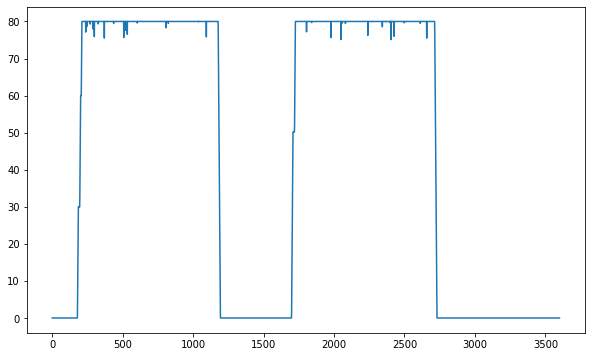

In [28]:
plt.figure(figsize=(10,6))
plt.plot(X, data_range['HV_voltage'].values)
plt.show()

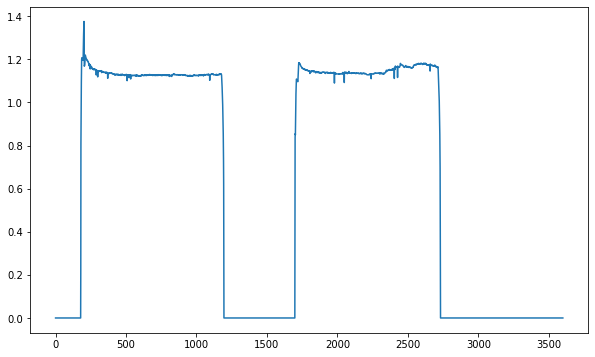

In [29]:
plt.figure(figsize=(10,6))
plt.plot(X, data_range['HV_current'].values)
plt.show()

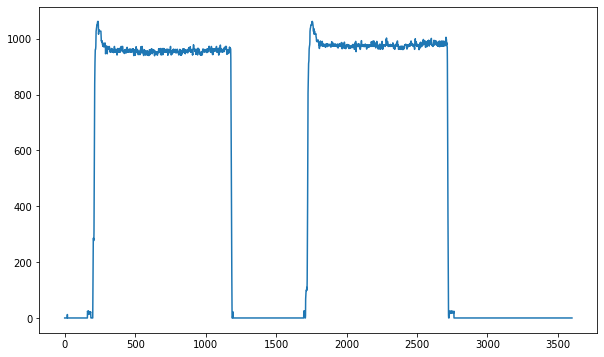

In [30]:
plt.figure(figsize=(10,6))
plt.plot(X, data_range['dose_corrected'].values)
plt.show()

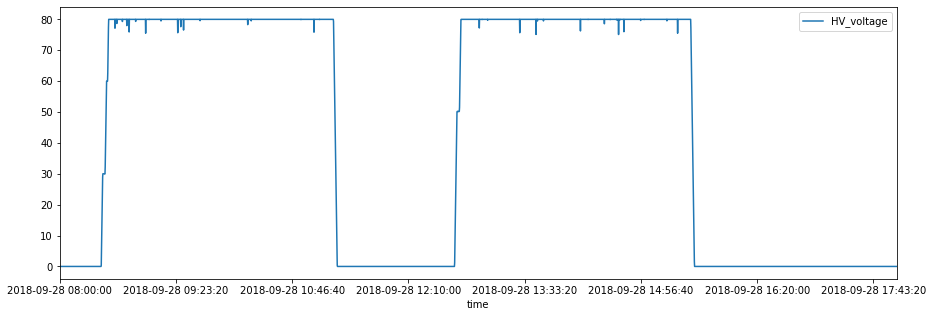

In [31]:

data_range.plot(x='time', y='HV_voltage', figsize=(15,5))
plt.show()

# Load all the data, reproduce the plots from Robert
Plots from Robert are in: /Users/hkromer/02_PhD/02_Data/02.NG_logs/robert_data

## 1. Load the data

In [67]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

path = '/Users/hkromer/02_PhD/tmp/data_robert_2/'
files = os.listdir(path)
files = [f for f in files if f.endswith('.csv')]



In [68]:
data = pd.DataFrame()
for f in files:
    _ = pd.read_csv(f'{path}{f}', index_col=0)
    _.index = pd.to_datetime(_.index, format='%Y-%m-%d %H:%M:%S')
    _.reset_index(inplace=True)
    data = data.append(_, ignore_index=True)
    
data.head()    

,time,HV_voltage,HV_current,dose_corrected,neutron_output
0,2019-08-30 00:00:00,0.0,0.0,19.573010,465052.736097
1,2019-08-30 00:00:10,0.0,0.0,24.366400,578943.203147
2,2019-08-30 00:00:20,0.0,0.0,17.176315,408107.502572
3,2019-08-30 00:00:30,0.0,0.0,21.969705,521997.969622
4,2019-08-30 00:00:40,0.0,0.0,19.573010,465052.736097


In [69]:
data['date'] = data['time'].apply(lambda x: f'{x.year}-{x.month}-{x.day}')
data.head()

,time,HV_voltage,HV_current,dose_corrected,neutron_output,date
0,2019-08-30 00:00:00,0.0,0.0,19.573010,465052.736097,2019-8-30
1,2019-08-30 00:00:10,0.0,0.0,24.366400,578943.203147,2019-8-30
2,2019-08-30 00:00:20,0.0,0.0,17.176315,408107.502572,2019-8-30
3,2019-08-30 00:00:30,0.0,0.0,21.969705,521997.969622,2019-8-30
4,2019-08-30 00:00:40,0.0,0.0,19.573010,465052.736097,2019-8-30


In [70]:
## make sure that there are equal amount of dates as there are initial csv files!
assert len(files) == len(data['date'].unique())

In [71]:
# sort values by time
data = data.sort_values(by=['time'], ascending=True)
# reset the index to be the time
data.set_index('time', inplace=True)

In [72]:
data['HV_voltage'] = np.abs(data['HV_voltage'])
data['HV_current'] = np.abs(data['HV_current'])
data['neutron_output'] = np.abs(data['neutron_output'])
# add new column beam power
data['beam_power'] = data['HV_voltage'] * data['HV_current']
# add new column output per beam power
data['output_per_beam_power'] = data['neutron_output'] / data['beam_power']
# add new column output per current
data['output_per_current'] = data['neutron_output'] / data['HV_current']
data.head()

,HV_voltage,HV_current,dose_corrected,neutron_output,date,beam_power,output_per_beam_power,output_per_current
time,,,,,,,,
2017-12-01 00:00:00,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN
2017-12-01 00:00:10,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN
2017-12-01 00:00:20,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN
2017-12-01 00:00:30,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN
2017-12-01 00:00:40,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN


In [53]:
# save the data
# data.to_csv(f'/Users/hkromer/02_PhD/02_Data/02.NG_logs/heiko_data/data_combined.csv')  # 66 MB

## 2. Make the plot "outputs_5.png" 
Histogram of all NG operation in terms of beam power

,HV_voltage,HV_current,dose_corrected,neutron_output,date,beam_power,output_per_beam_power,output_per_current
time,,,,,,,,
2017-12-01 00:00:00,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN
2017-12-01 00:00:10,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN
2017-12-01 00:00:20,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN
2017-12-01 00:00:30,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN
2017-12-01 00:00:40,0.0,0.0,0.0,0.0,2017-12-1,0.0,NaN,NaN


In [55]:
data['output_per_current'].describe()

count    4.271000e+05
mean              inf
std               NaN
min      0.000000e+00
25%      1.843663e+07
50%      2.165367e+07
75%               inf
max               inf
Name: output_per_current, dtype: float64

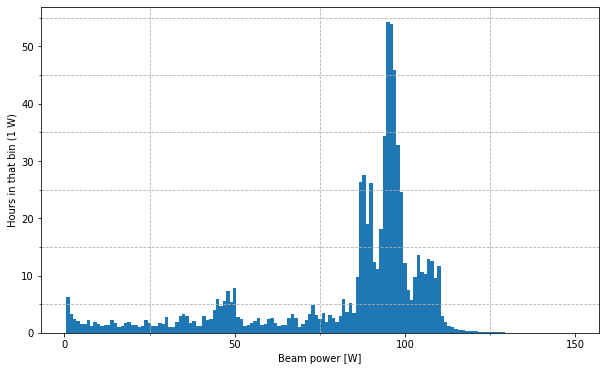

In [56]:

# make bins
bins = np.arange(0,150+1,1)
# histogram, counts is in counts of 10 seconds intervals
counts, bin_edges = np.histogram(data['beam_power'].values, bins=bins)
# counts to hours spend in that bin
counts = (counts / 6) / 60
fig = plt.figure(figsize=(10, 6))
plt.bar(bin_edges[1:-1], counts[1:], width = 1)
plt.xlabel('Beam power [W]')
plt.ylabel('Hours in that bin (1 W)')
plt.xticks([0, 50, 100, 150])
ax1=plt.gca()
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)
ax1.grid(b=True, which='minor', linestyle='--')
plt.show()

In [57]:
def plot_hist_beam_power(data, start_date, end_date, ylims):
    """
    data: DATAFRAME, full data. index must be datetime object
    start_date: STRING, date when to start taking into account; format '2017-01-01 00:00:00'
    end_date: STRING, date when to stop taking into account; format '2017-01-01 00:00:00'
    """
    data = data[start_date:end_date]
    # make bins
    bins = np.arange(0,150+1,1)
    # histogram, counts is in counts of 10 seconds intervals
    counts, bin_edges = np.histogram(data['beam_power'].values, bins=bins)
    # counts to hours spend in that bin
    counts = (counts / 6) / 60
    fig = plt.figure(figsize=(10, 4))
    plt.bar(bin_edges[1:-1], counts[1:], width = 1)
    plt.xlabel('Beam power [W]')
    plt.ylabel('Hours in that bin (1 W)')
    start = f'{data.index[0].year}-{data.index[0].month}-{data.index[0].day}'
    end = f'{data.index[-1].year}-{data.index[-1].month}-{data.index[-1].day}'
    plt.title(f'Data from {start} until {end}')
    plt.xticks([0, 50, 100, 150])
    plt.ylim(ylims[0], ylims[1])
    ax1=plt.gca()
    minor_locator = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator)
    # minor ticks y
    minor_locator = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator)
    ax1.grid(b=True, which='minor', linestyle='--')
    plt.show()

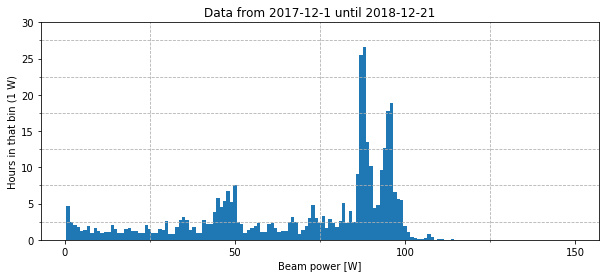

In [58]:
start_date = '2017-01-01 00:00:00'
end_date = '2019-01-01 00:00:00'
ylims = [0, 30]
plot_hist_beam_power(data, start_date, end_date, ylims)

## 3. Make the plot "outputs_3.png" 
Histogram of all NG operation in terms of output

In [59]:
def plot_hist_output(data, start_date, end_date, ylims):
    """
    data: DATAFRAME, full data. index must be datetime object
    start_date: STRING, date when to start taking into account; format '2017-01-01 00:00:00'
    end_date: STRING, date when to stop taking into account; format '2017-01-01 00:00:00'
    """
    data = data[start_date:end_date]
    # make bins
    max_bins = 4e7
    step_bins = 1e6
    bins = np.arange(0,max_bins+step_bins,step_bins)
    # histogram, counts is in counts of 10 seconds intervals
    counts, bin_edges = np.histogram(data['neutron_output'].values, bins=bins)
#     print(counts, bin_edges)
    # counts to hours spend in that bin
    counts = (counts / 6) / 60
    fig = plt.figure(figsize=(10, 4))
    plt.bar(bin_edges[1:-1], counts[1:], width = step_bins)
    plt.xlabel('Neutron output [n/s]')
    plt.ylabel('Hours in that bin (1e6 n/s)')
    start = f'{data.index[0].year}-{data.index[0].month}-{data.index[0].day}'
    end = f'{data.index[-1].year}-{data.index[-1].month}-{data.index[-1].day}'
    plt.title(f'Data from {start} until {end}')
#     plt.xticks([0, 50, 100, 150])
    ax1=plt.gca()
    plt.ylim(ylims[0], ylims[1])
    minor_locator = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator)
    # minor ticks y
    minor_locator = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator)
    ax1.grid(b=True, which='minor', linestyle='--')
    plt.show()

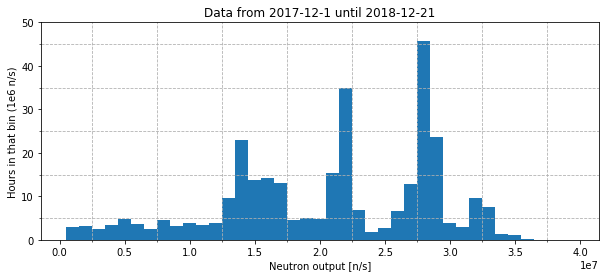

In [60]:
start_date = '2017-01-01 00:00:00'
end_date = '2019-01-01 00:00:00'
ylims = [0, 50]
plot_hist_output(data, start_date, end_date, ylims)

## 3. ONE function to rule them all


In [ ]:
def plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color):
    """
    data: DATAFRAME, full data. index must be datetime object
    col: STRING, what column to take for the plot
    start_date: STRING, date when to start taking into account; format '2017-01-01 00:00:00'
    end_date: STRING, date when to stop taking into account; format '2017-01-01 00:00:00'
    ylims: list with ylim lower and upper, length must be 2
    xlabel: STRING, x plot label
    ylabel: STRING, y plot label
    max_bins: number, what the maximum bins should be
    step_bins: number, what the bin stepping should be
    """
    data = data[start_date:end_date]
    # make bins

    bins = np.arange(0,max_bins+step_bins,step_bins)
    # histogram, counts is in counts of 10 seconds intervals
    counts, bin_edges = np.histogram(data[col].values, bins=bins)
#     print(counts, bin_edges)
    # counts to hours spend in that bin
    counts = (counts / 6) / 60
    fig = plt.figure(figsize=(10, 4))
    plt.bar(bin_edges[1:-1], counts[1:], width = step_bins, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    start = f'{data.index[0].year}-{data.index[0].month}-{data.index[0].day}'
    end = f'{data.index[-1].year}-{data.index[-1].month}-{data.index[-1].day}'
    plt.title(f'Data from {start} until {end}')
#     plt.xticks([0, 50, 100, 150])
    ax1=plt.gca()
    plt.ylim(ylims[0], ylims[1])
    minor_locator = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator)
    # minor ticks y
    minor_locator = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator)
    ax1.grid(b=True, which='minor', linestyle='--')
    plt.show()

# Plots for the water cooled and air cooled target

## both


In [ ]:
start_date = '2017-01-01 00:00:00'
end_date = '2019-09-25 00:00:00'
color = 'darkorange'

# beam power
col = 'beam_power'
xlabel = 'Beam power [W]'
ylabel = 'Hours in that bin (1 W)'
ylims = [0, 40]
max_bins = 150
step_bins = 1
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# neutron output
col = 'neutron_output'
xlabel = 'Neutron output [n/s]'
ylabel = 'Hours in that bin (1e6 n/s)'
ylims = [0, 100]
max_bins = 4e7
step_bins = 1e6
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# High voltage
col = 'HV_voltage'
xlabel = 'HV [kV]'
ylabel = 'Hours in that bin (1 kV)'
ylims = [0, 500]
max_bins = 100
step_bins = 1
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# High voltage current
col = 'HV_current'
xlabel = 'current [mA]'
ylabel = 'Hours in that bin (0.02 mA)'
ylims = [0, 75]
max_bins = 2
step_bins = 0.02
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# Output per beam power
col = 'output_per_beam_power'
xlabel = 'Output per beam power [n/s/W]'
ylabel = 'Hours in that bin (5e3 n/s/W)'
ylims = [0, 45]
max_bins = 4e5
step_bins = 5e3
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# Output per current
col = 'output_per_current'
xlabel = 'Output per current [n/s/mA]'
ylabel = 'Hours in that bin (5e5 n/s/mA)'
ylims = [0, 50]
max_bins = 3.5e7
step_bins = 5e5
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

## Water cooled

In [ ]:
start_date = '2017-01-01 00:00:00'
end_date = '2018-09-25 00:00:00'
color = 'darkblue'
# beam power
col = 'beam_power'
xlabel = 'Beam power [W]'
ylabel = 'Hours in that bin (1 W)'
ylims = [0, 40]
max_bins = 150
step_bins = 1
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# neutron output
col = 'neutron_output'
xlabel = 'Neutron output [n/s]'
ylabel = 'Hours in that bin (1e6 n/s)'
ylims = [0, 100]
max_bins = 4e7
step_bins = 1e6
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# High voltage
col = 'HV_voltage'
xlabel = 'HV [kV]'
ylabel = 'Hours in that bin (1 kV)'
ylims = [0, 500]
max_bins = 100
step_bins = 1
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# High voltage current
col = 'HV_current'
xlabel = 'current [mA]'
ylabel = 'Hours in that bin (0.02 mA)'
ylims = [0, 75]
max_bins = 2
step_bins = 0.02
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# Output per beam power
col = 'output_per_beam_power'
xlabel = 'Output per beam power [n/s/W]'
ylabel = 'Hours in that bin (5e3 n/s/W)'
ylims = [0, 45]
max_bins = 4e5
step_bins = 5e3
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# Output per current
col = 'output_per_current'
xlabel = 'Output per current [n/s/mA]'
ylabel = 'Hours in that bin (5e5 n/s/mA)'
ylims = [0, 50]
max_bins = 3.5e7
step_bins = 5e5
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

## Air cooled

In [ ]:
start_date = '2018-09-25 00:00:00'
end_date = '2019-09-25 00:00:00'
color = 'darkred'
# beam power
col = 'beam_power'
xlabel = 'Beam power [W]'
ylabel = 'Hours in that bin (1 W)'
ylims = [0, 40]
max_bins = 150
step_bins = 1
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# neutron output
col = 'neutron_output'
xlabel = 'Neutron output [n/s]'
ylabel = 'Hours in that bin (1e6 n/s)'
ylims = [0, 100]
max_bins = 4e7
step_bins = 1e6
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# High voltage
col = 'HV_voltage'
xlabel = 'HV [kV]'
ylabel = 'Hours in that bin (1 kV)'
ylims = [0, 500]
max_bins = 100
step_bins = 1
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# High voltage current
col = 'HV_current'
xlabel = 'current [mA]'
ylabel = 'Hours in that bin (0.02 mA)'
ylims = [0, 75]
max_bins = 2
step_bins = 0.02
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# Output per beam power
col = 'output_per_beam_power'
xlabel = 'Output per beam power [n/s/W]'
ylabel = 'Hours in that bin (5e3 n/s/W)'
ylims = [0, 45]
max_bins = 4e5
step_bins = 5e3
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# Output per current
col = 'output_per_current'
xlabel = 'Output per current [n/s/mA]'
ylabel = 'Hours in that bin (5e5 n/s/mA)'
ylims = [0, 50]
max_bins = 3.5e7
step_bins = 5e5
plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

# Some investigations temporal

In [ ]:

def plot_for_date_range(start_date, end_date, color):
    # beam power
    col = 'beam_power'
    xlabel = 'Beam power [W]'
    ylabel = 'Hours in that bin (1 W)'
    ylims = [0, 40]
    max_bins = 150
    step_bins = 1
    plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

    # neutron output
    col = 'neutron_output'
    xlabel = 'Neutron output [n/s]'
    ylabel = 'Hours in that bin (1e6 n/s)'
    ylims = [0, 100]
    max_bins = 4e7
    step_bins = 1e6
    plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

    # High voltage
    col = 'HV_voltage'
    xlabel = 'HV [kV]'
    ylabel = 'Hours in that bin (1 kV)'
    ylims = [0, 500]
    max_bins = 100
    step_bins = 1
    plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

    # High voltage current
    col = 'HV_current'
    xlabel = 'current [mA]'
    ylabel = 'Hours in that bin (0.02 mA)'
    ylims = [0, 75]
    max_bins = 2
    step_bins = 0.02
    plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

    # Output per beam power
    col = 'output_per_beam_power'
    xlabel = 'Output per beam power [n/s/W]'
    ylabel = 'Hours in that bin (5e3 n/s/W)'
    ylims = [0, 45]
    max_bins = 4e5
    step_bins = 5e3
    plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

    # Output per current
    col = 'output_per_current'
    xlabel = 'Output per current [n/s/mA]'
    ylabel = 'Hours in that bin (5e5 n/s/mA)'
    ylims = [0, 50]
    max_bins = 3.5e7
    step_bins = 5e5
    plot_hist(data, col, start_date, end_date, ylims, xlabel, ylabel, max_bins, step_bins, color)

## Air cooled, September 25 until December 10 of 2018

In [ ]:
start_date = '2018-09-25 00:00:00'
end_date = '2018-12-10 00:00:00'
color = 'darkgreen'

plot_for_date_range(start_date, end_date, color)

## Air cooled, December 11 of 2018 until April 15 2019

In [ ]:
start_date = '2018-12-11 00:00:00'
end_date = '2019-04-15 00:00:00'
color = 'magenta'

plot_for_date_range(start_date, end_date, color)

## Air cooled, April 15 2019 until July 15 2019

In [ ]:
start_date = '2019-04-15 00:00:00'
end_date = '2019-07-15 00:00:00'
color = 'teal'

plot_for_date_range(start_date, end_date, color)

# On one axis, moving the split window for the air cooled case

In [73]:
def plot_hist_split(data1, data2, date, next_date, col, ylims, xlabel, ylabel, max_bins, step_bins, color1, color2):

    # make bins

    bins = np.arange(0,max_bins+step_bins,step_bins)
    # histogram, counts is in counts of 10 seconds intervals
    counts1, bin_edges1 = np.histogram(data1[col].values, bins=bins)
    counts2, bin_edges2 = np.histogram(data2[col].values, bins=bins)
#     print(counts, bin_edges)
    # counts to hours spend in that bin
    counts1 = (counts1 / 6) / 60
    counts2 = (counts2 / 6) / 60
    fig = plt.figure(figsize=(10, 4))
    start1 = data1['date'][0]
    end1 = data1['date'][-1]
    start2 = data2['date'][0]
    end2 = data2['date'][-1]
    plt.bar(bin_edges2[1:-1], counts2[1:], width = step_bins, color=color2, label=f'from {start2} until {end2}', alpha=0.75)
    plt.bar(bin_edges1[1:-1], counts1[1:], width = step_bins, color=color1, label=f'from {start1} until {end1}', alpha=0.75)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Data from {start1} until {end2}, split {end1}')
#     plt.xticks([0, 50, 100, 150])
    ax1=plt.gca()
    plt.ylim(ylims[0], ylims[1])
    minor_locator = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator)
    # minor ticks y
    minor_locator = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator)
    ax1.grid(b=True, which='minor', linestyle='--')
    plt.legend()
    plt.show()

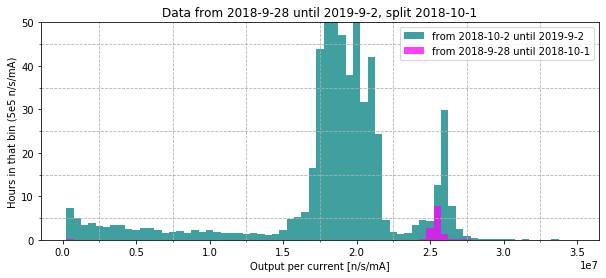

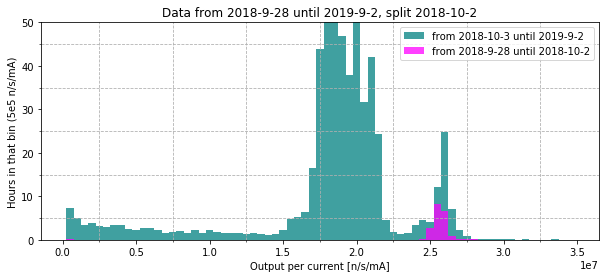

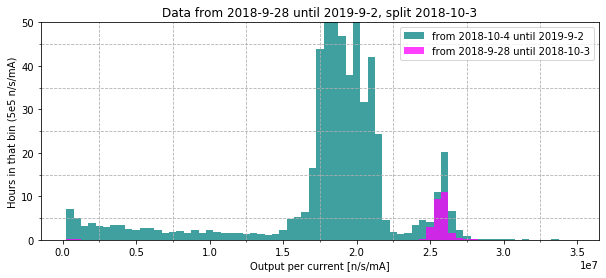

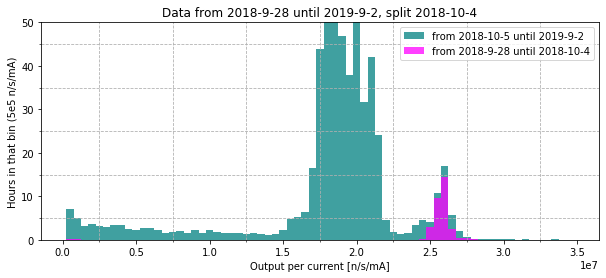

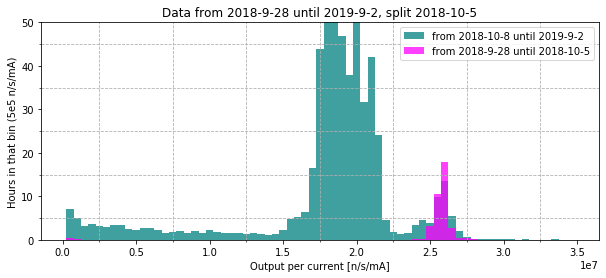

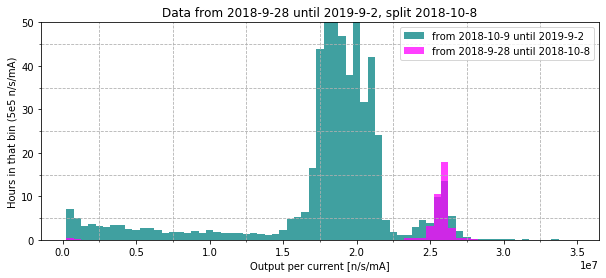

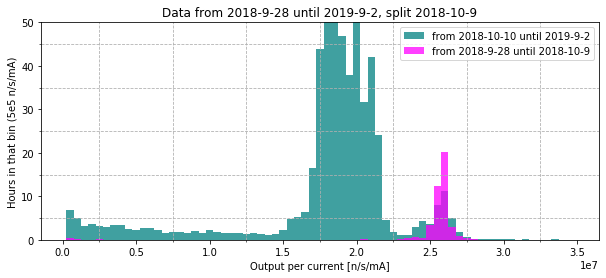

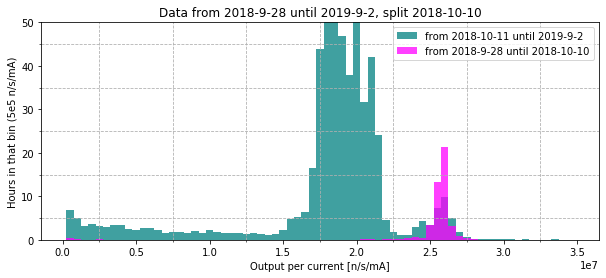

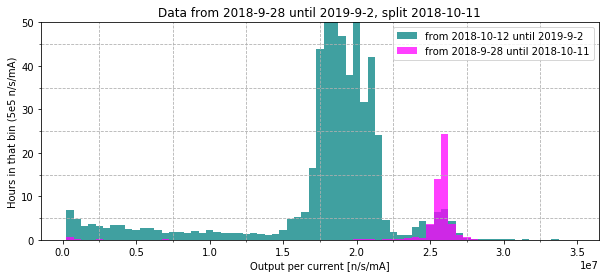

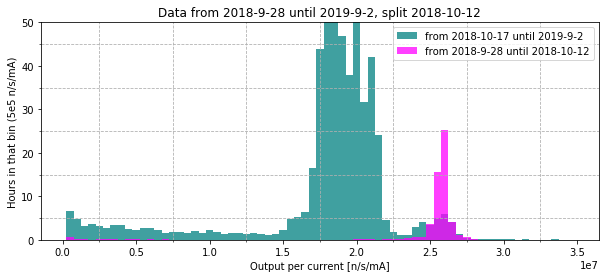

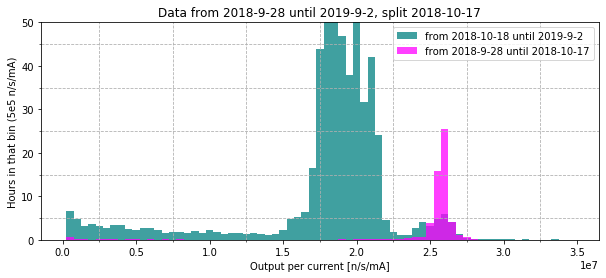

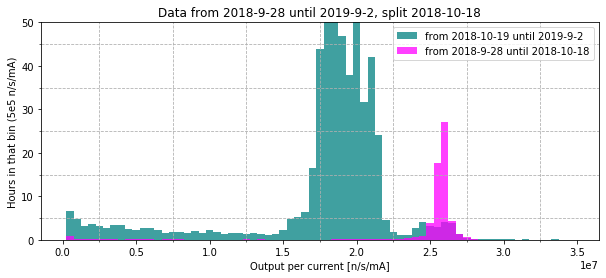

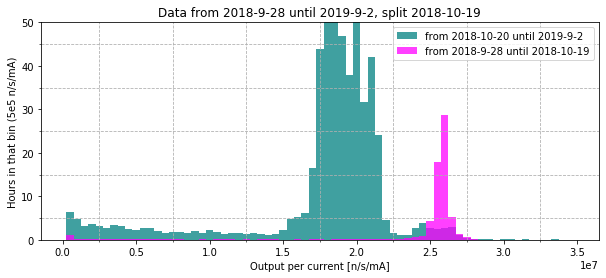

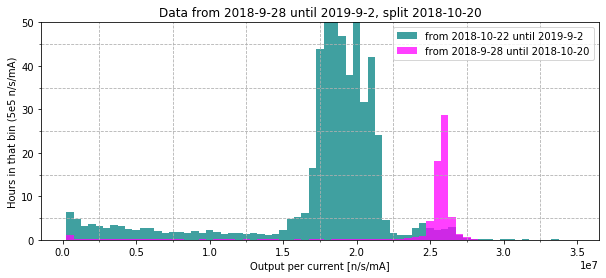

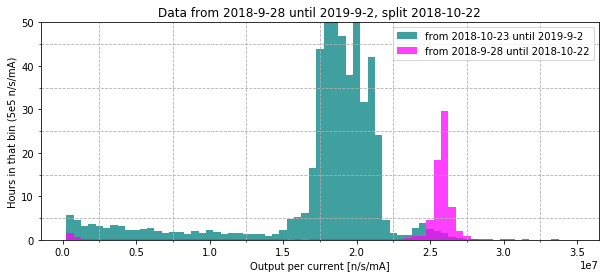

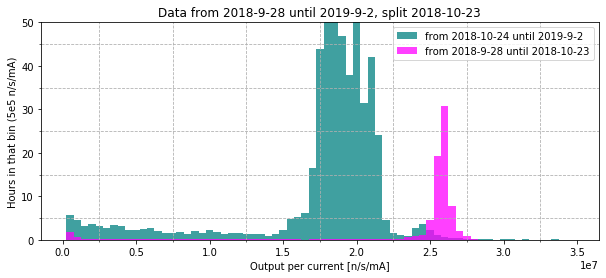

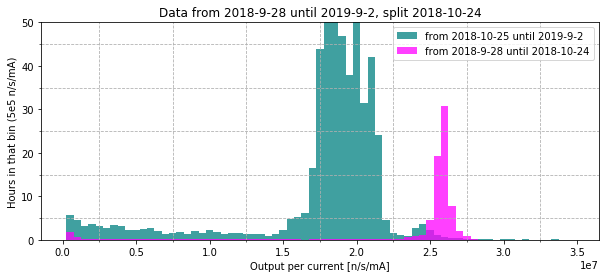

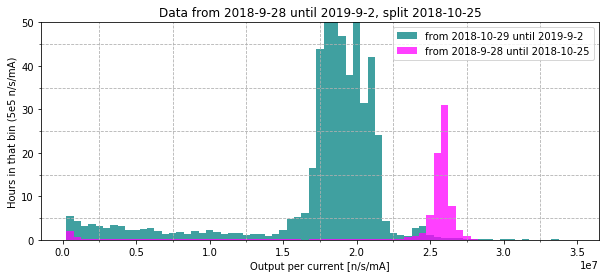

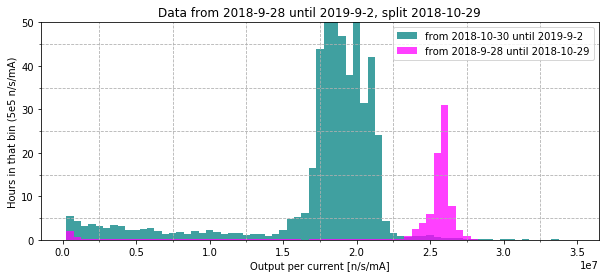

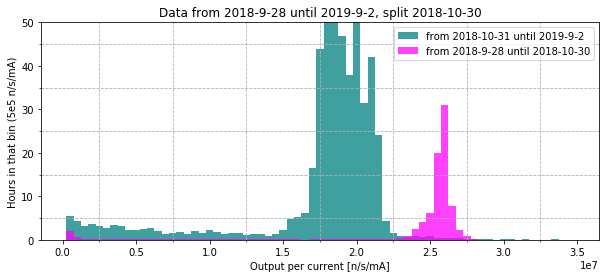

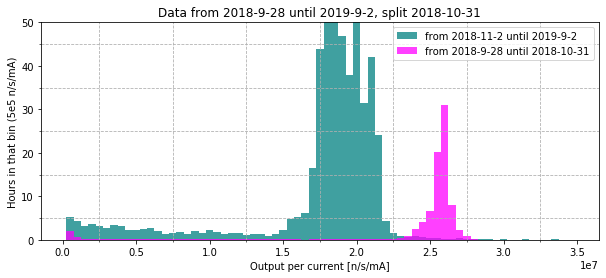

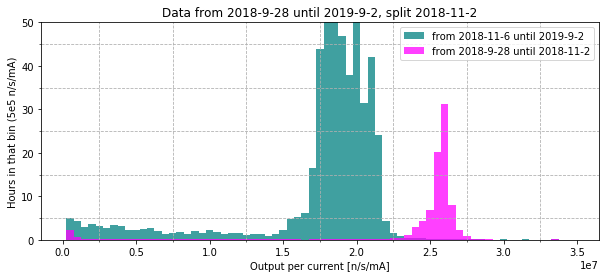

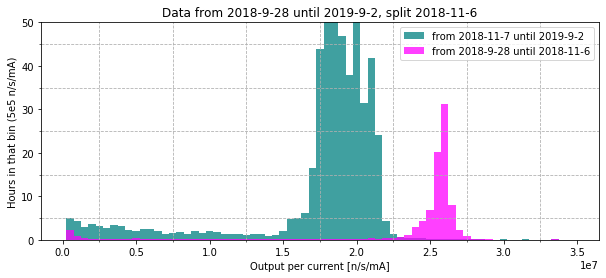

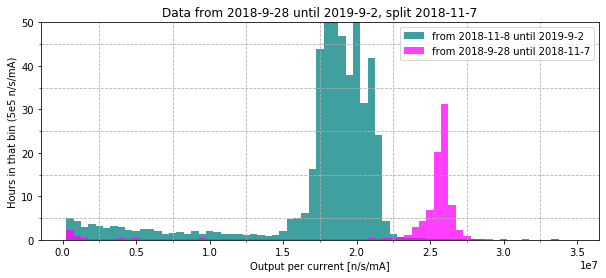

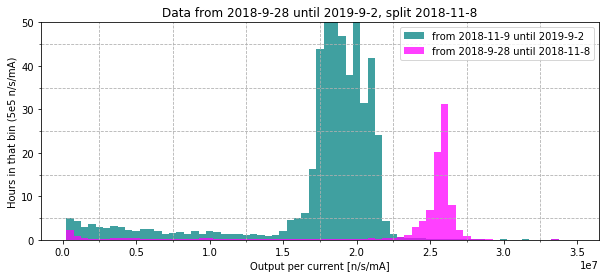

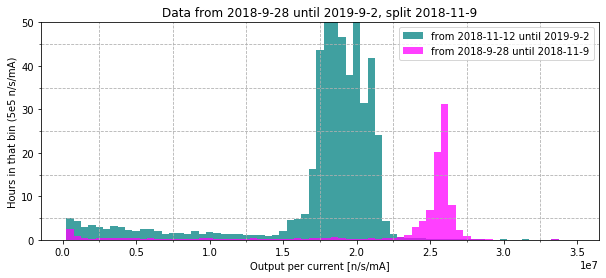

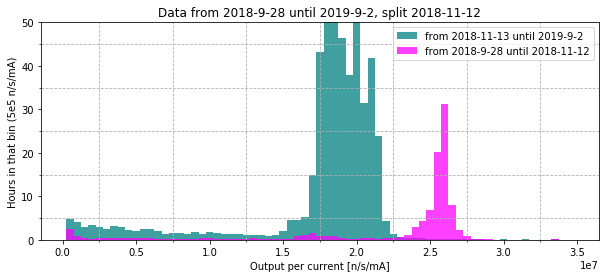

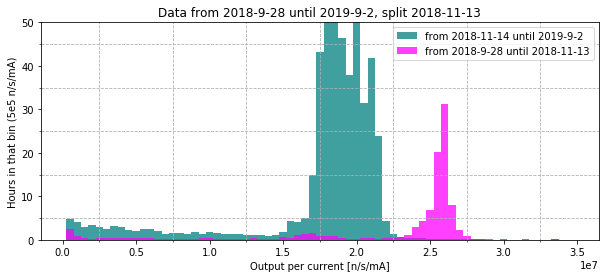

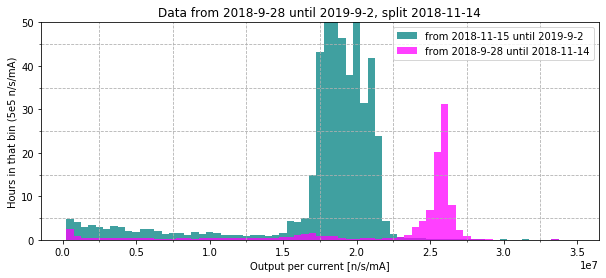

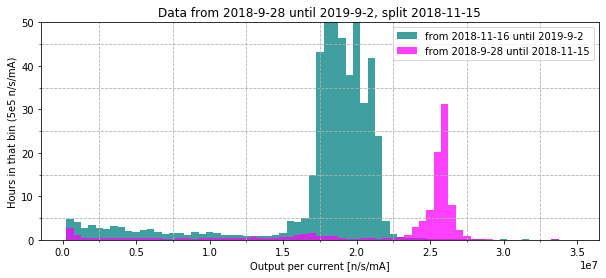

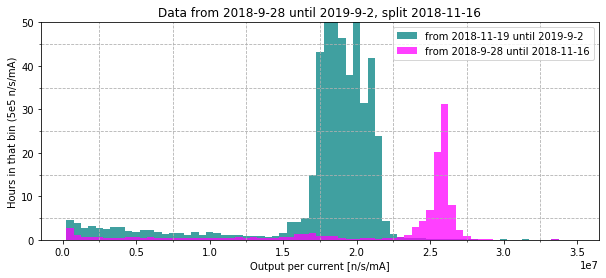

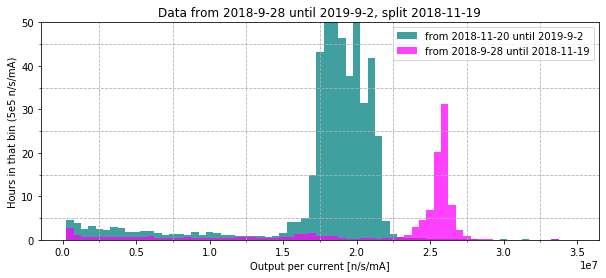

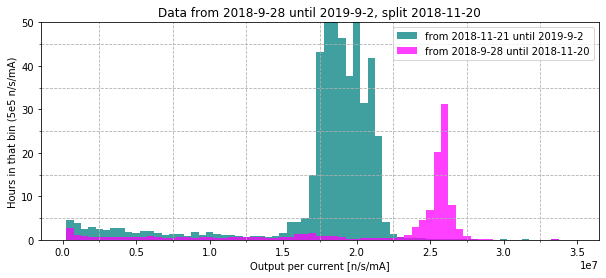

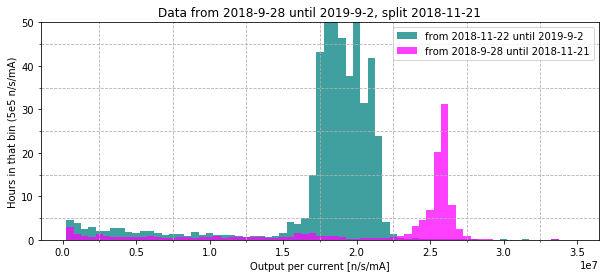

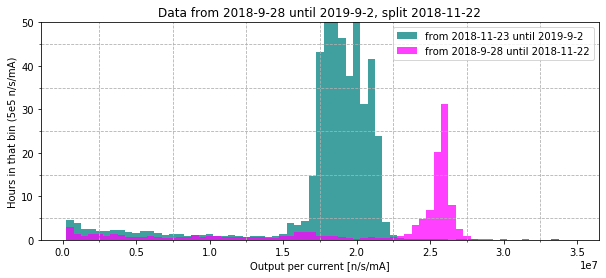

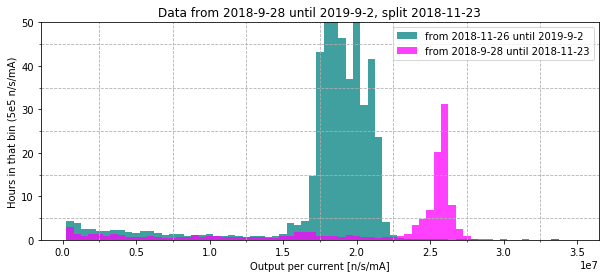

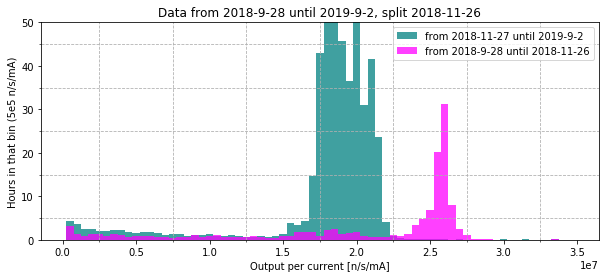

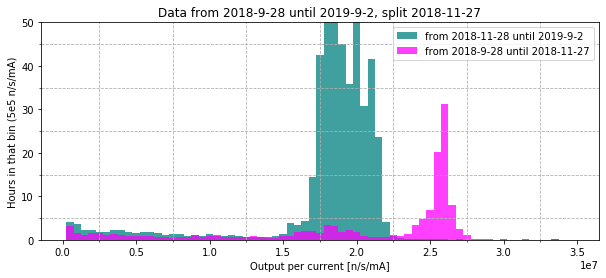

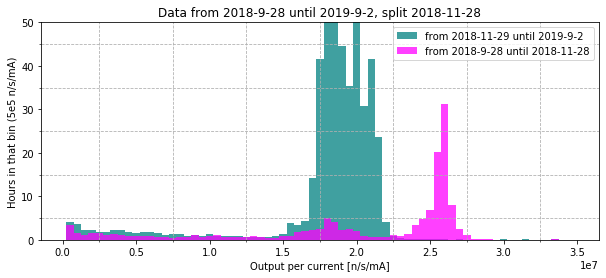

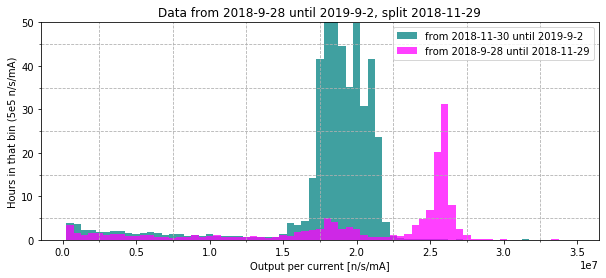

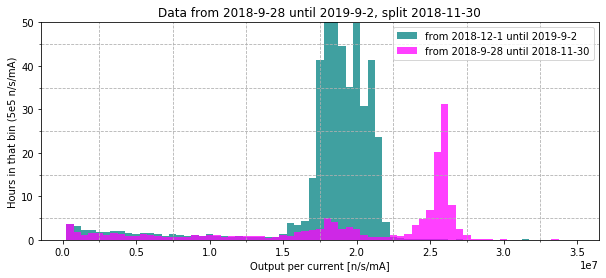

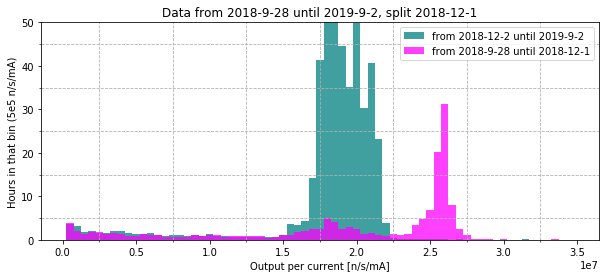

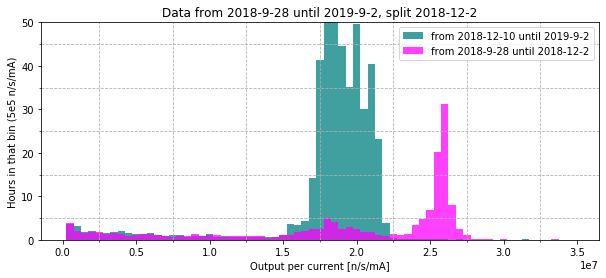

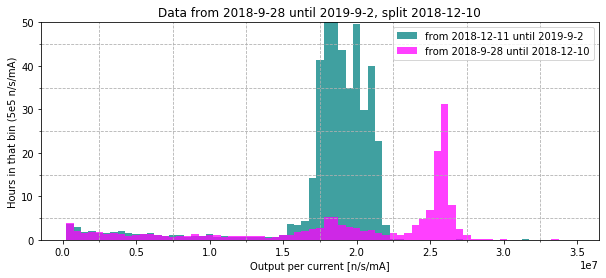

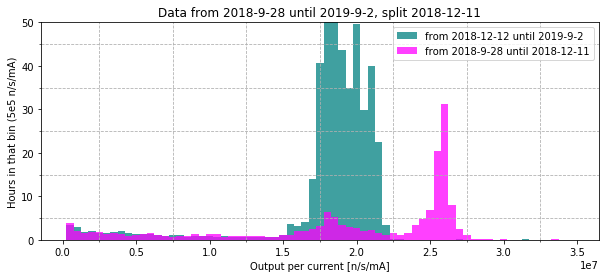

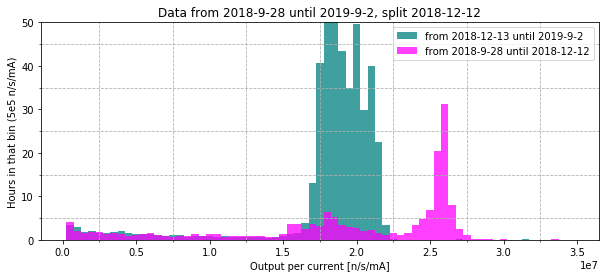

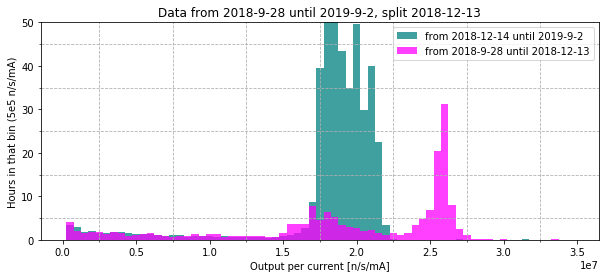

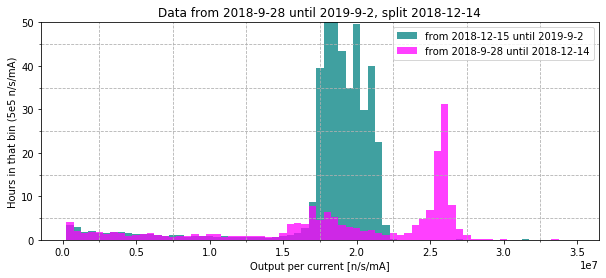

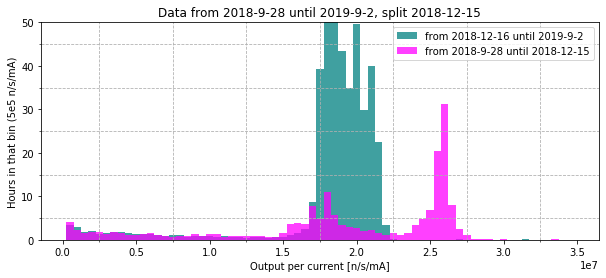

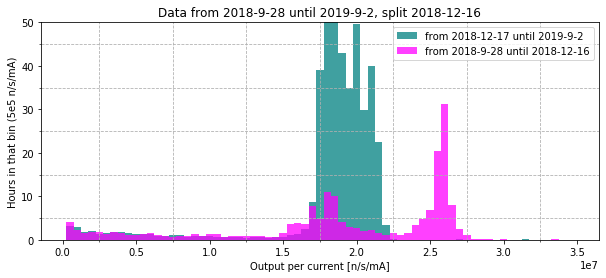

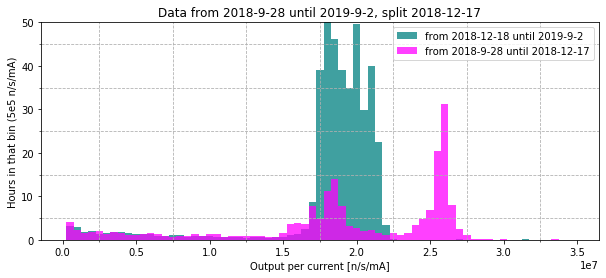

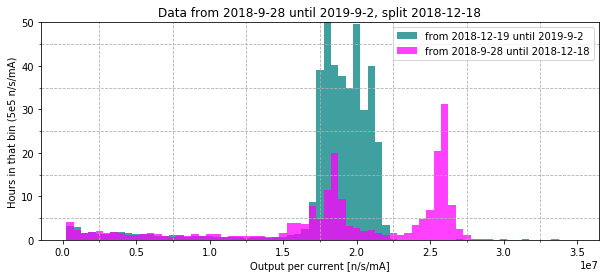

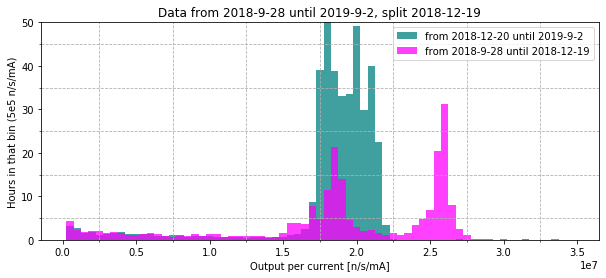

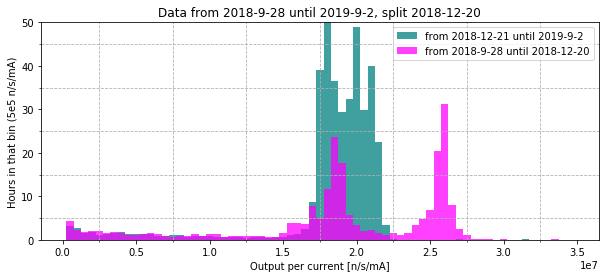

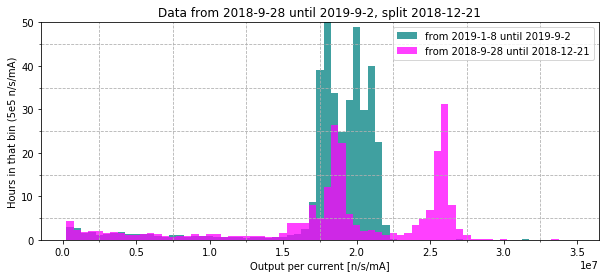

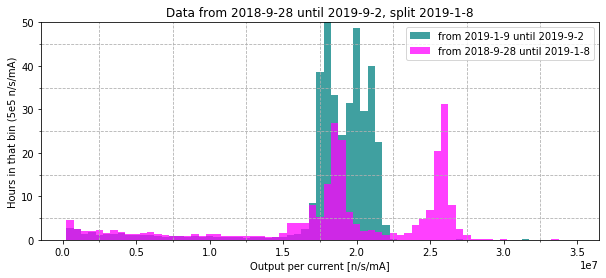

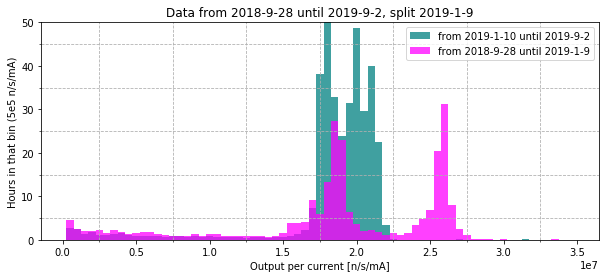

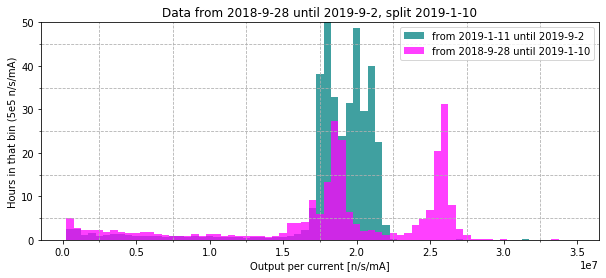

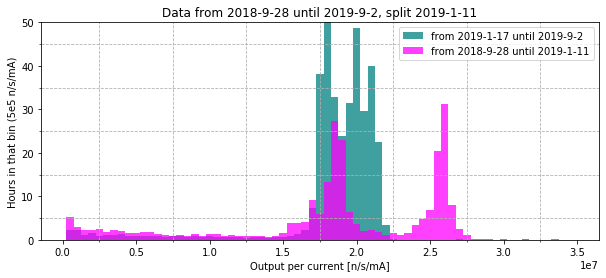

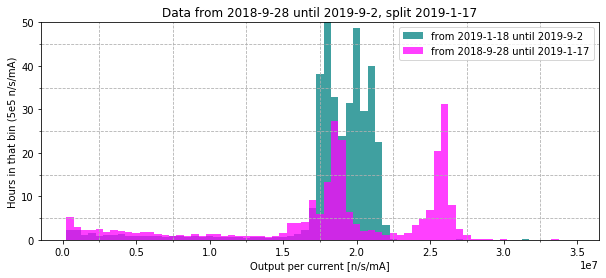

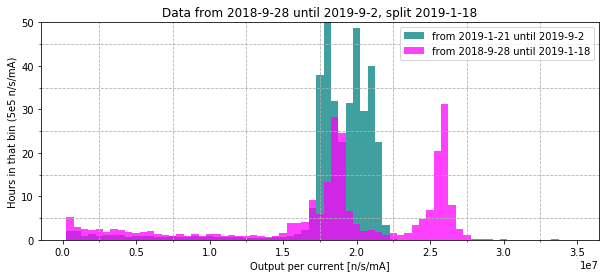

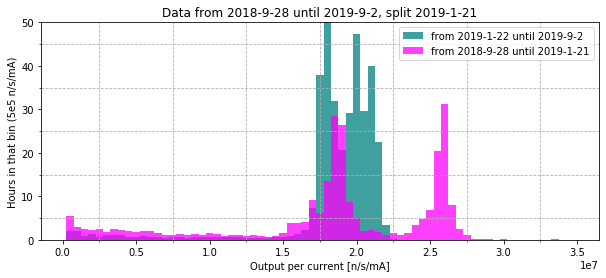

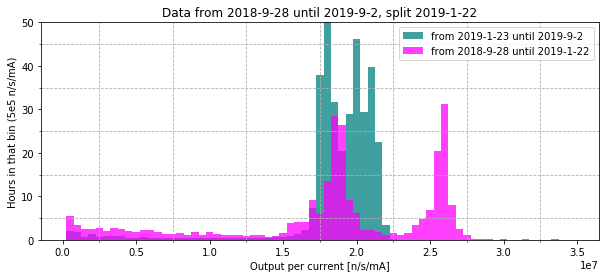

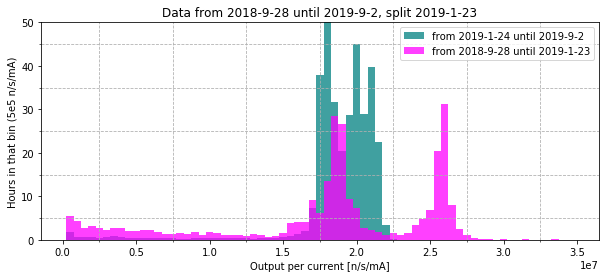

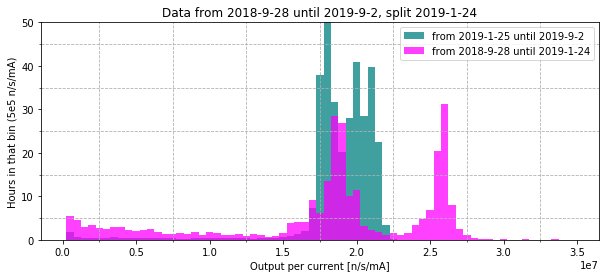

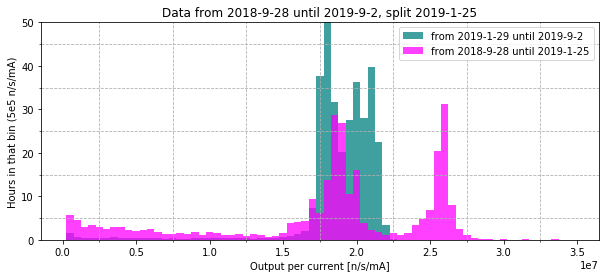

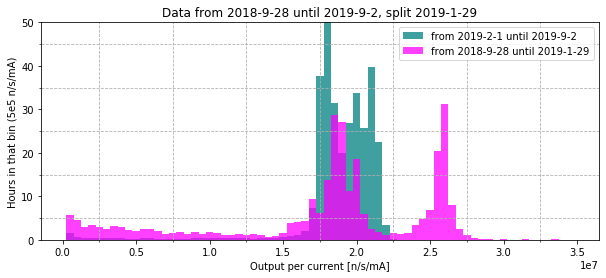

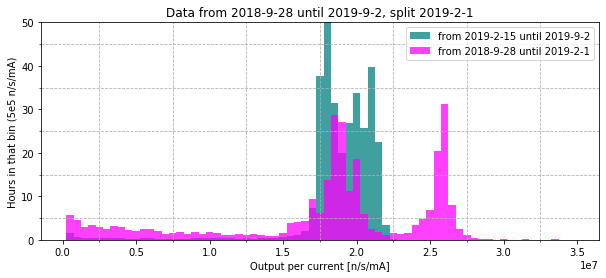

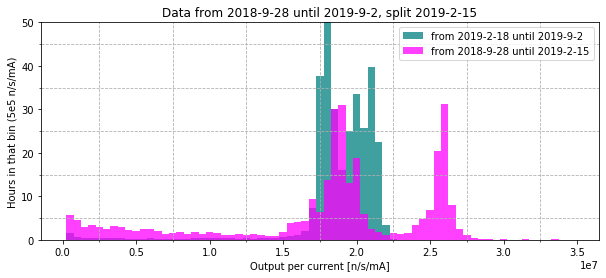

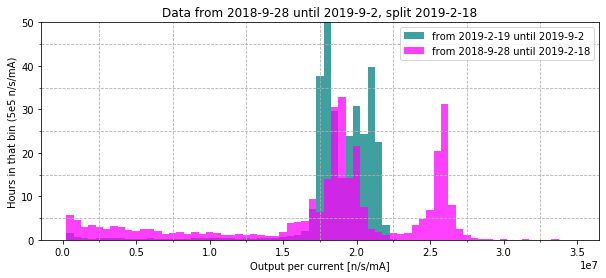

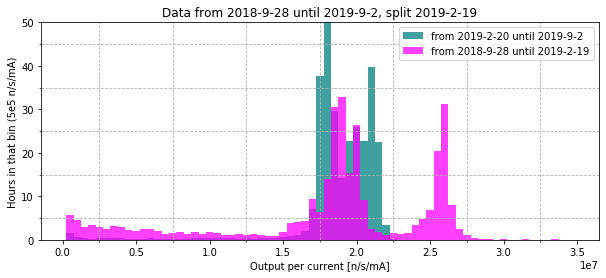

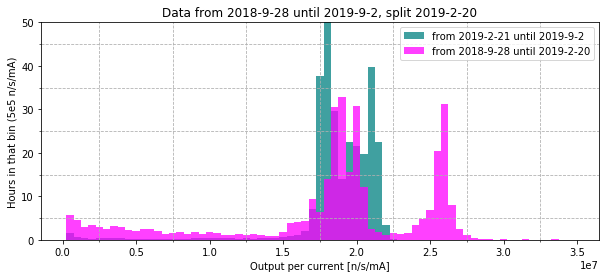

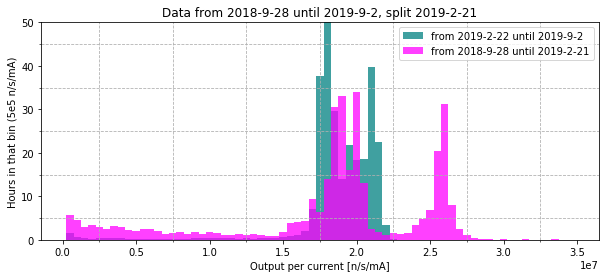

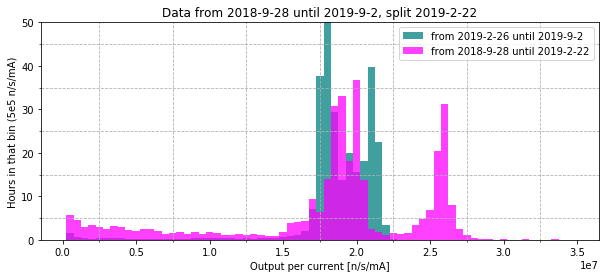

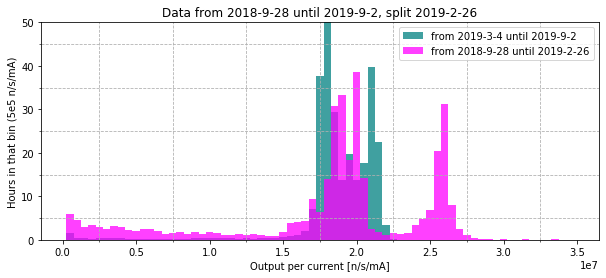

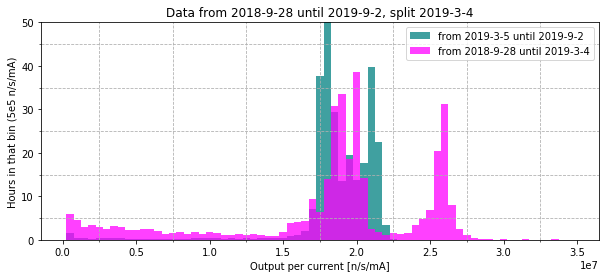

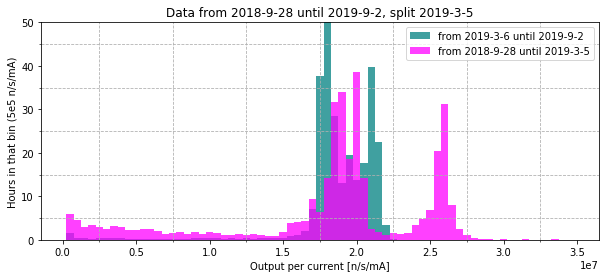

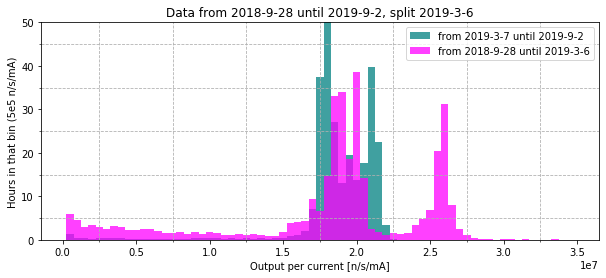

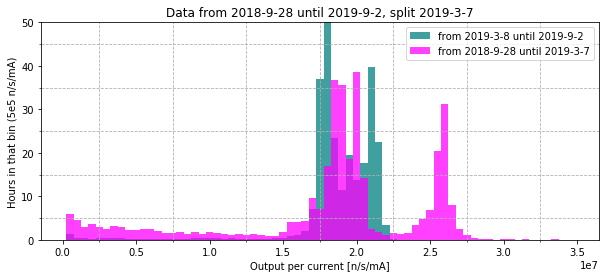

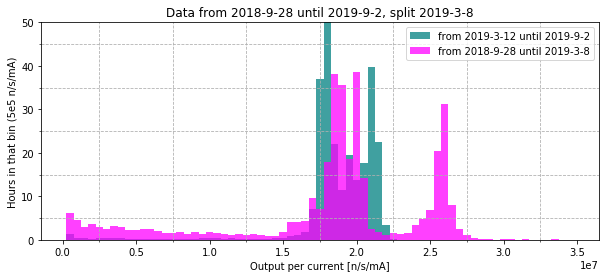

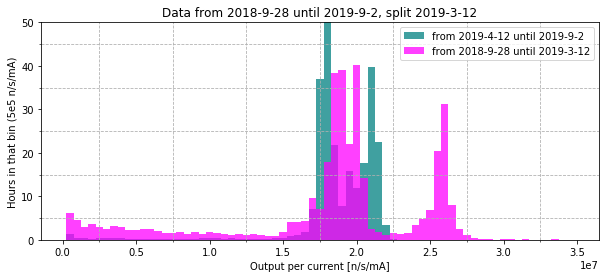

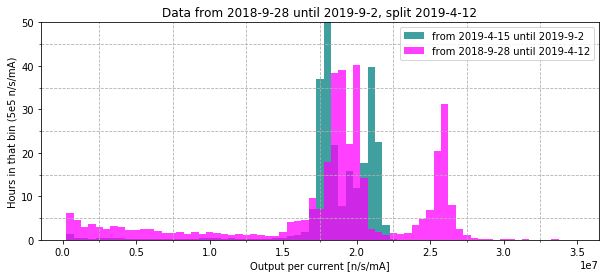

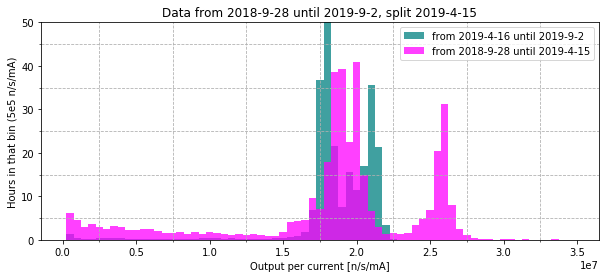

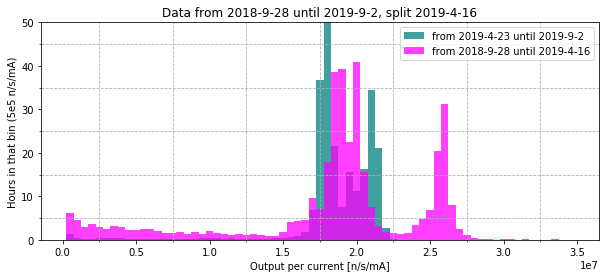

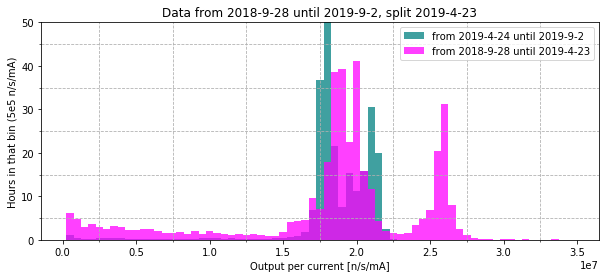

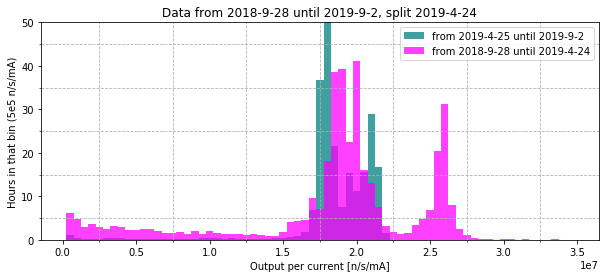

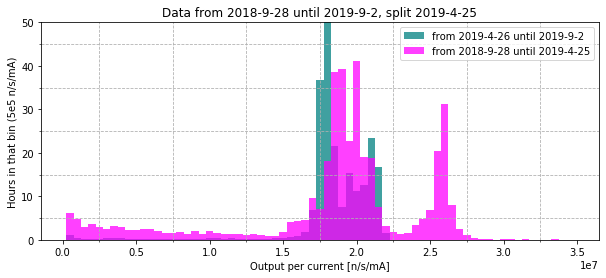

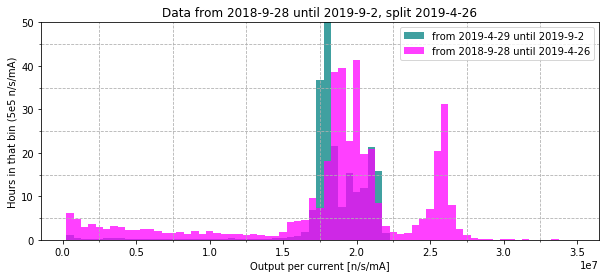

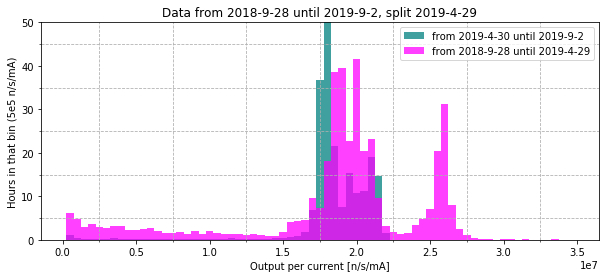

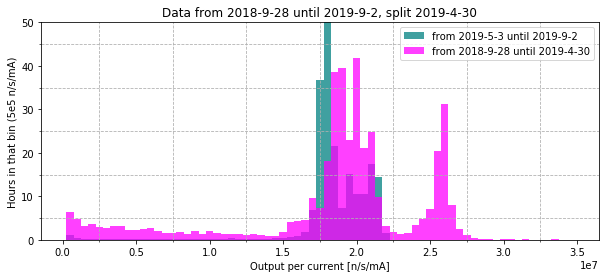

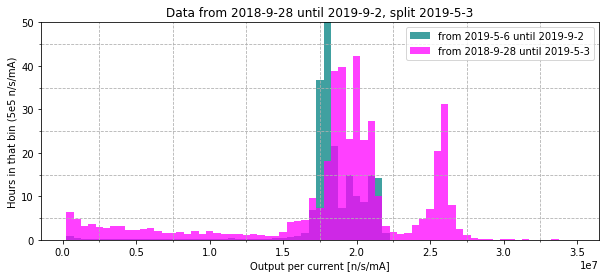

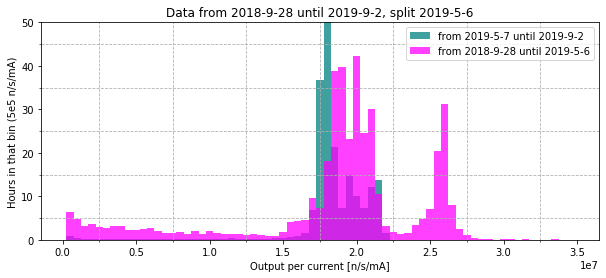

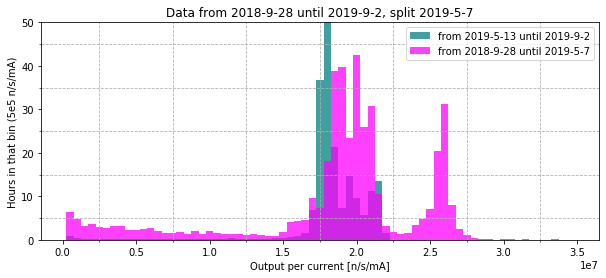

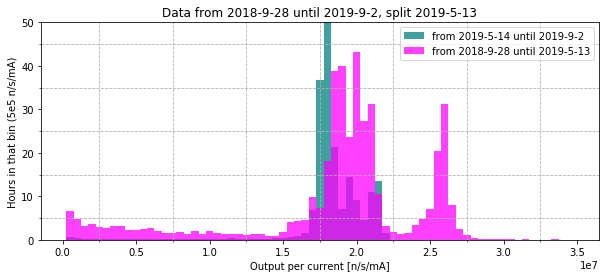

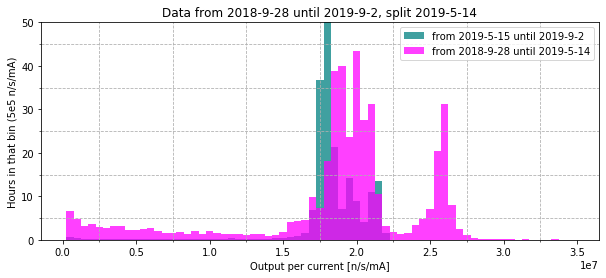

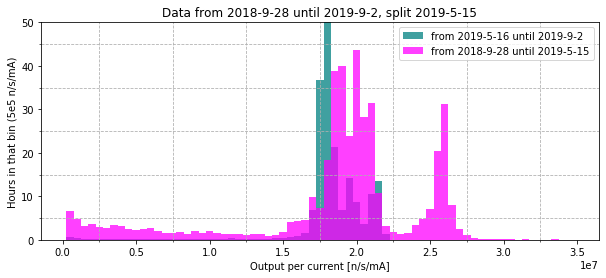

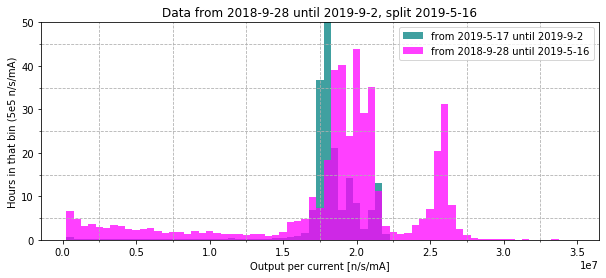

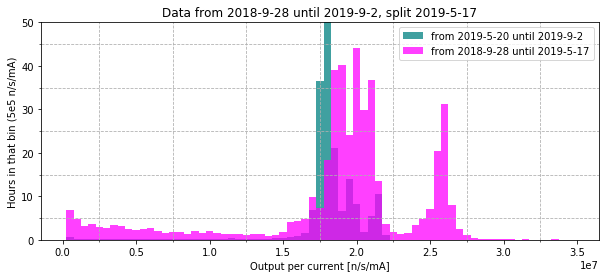

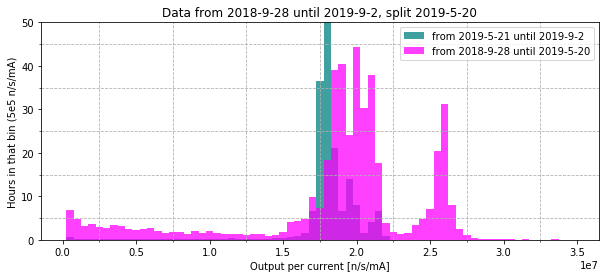

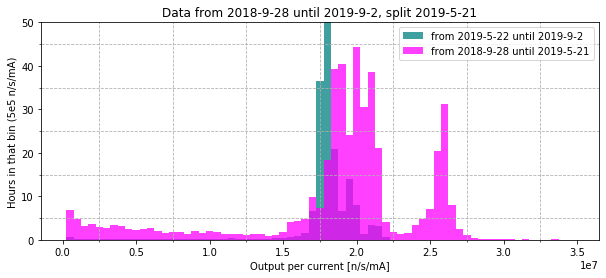

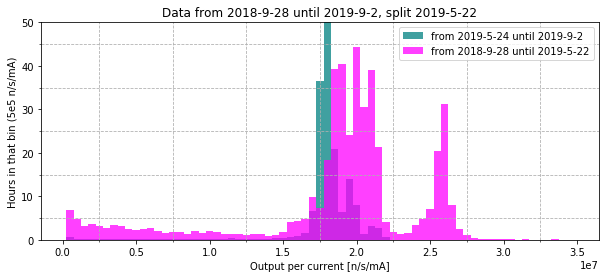

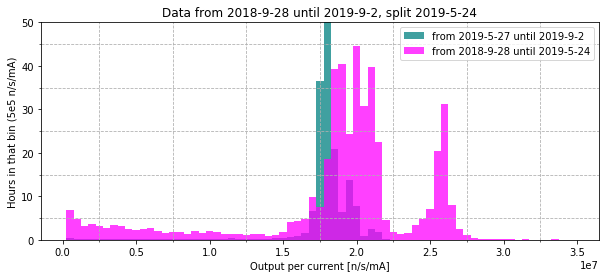

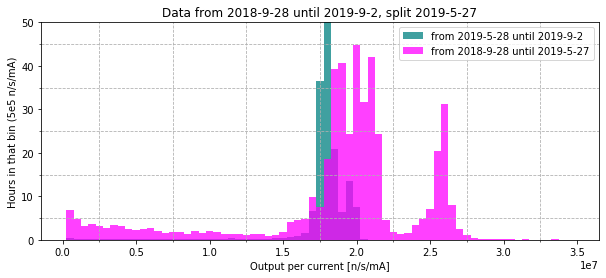

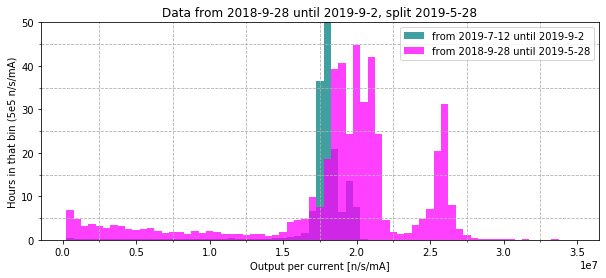

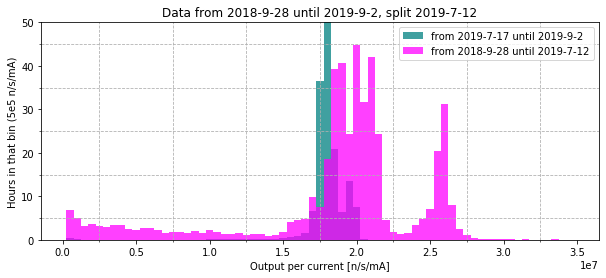

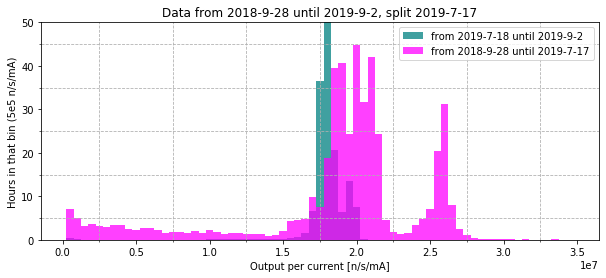

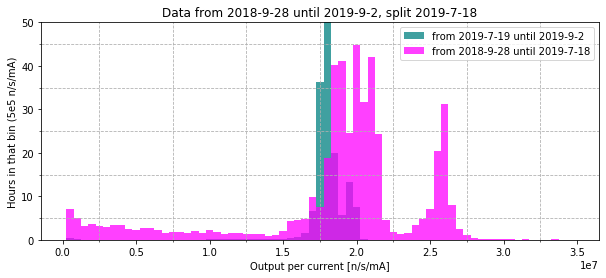

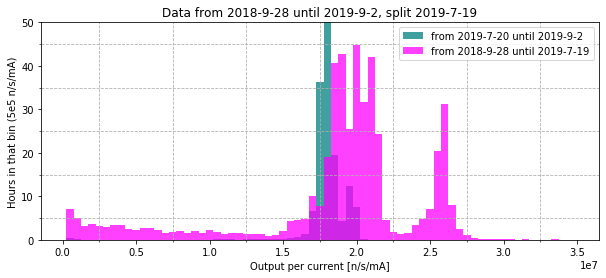

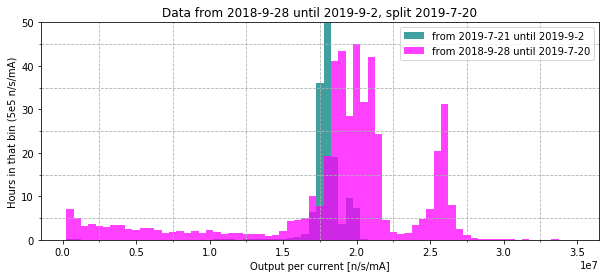

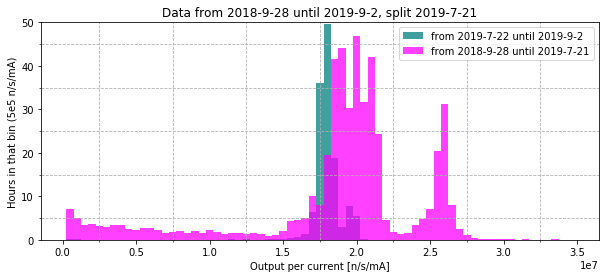

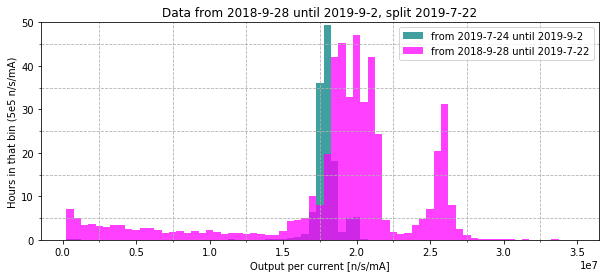

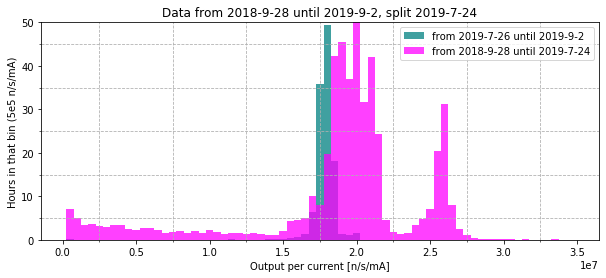

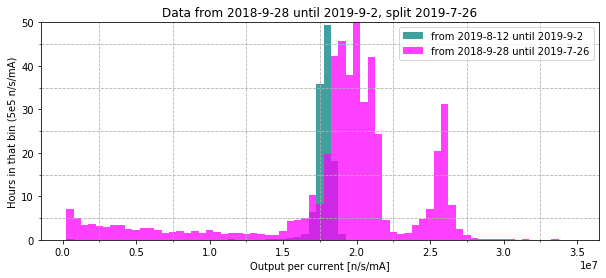

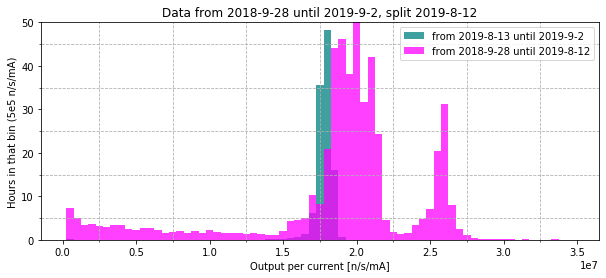

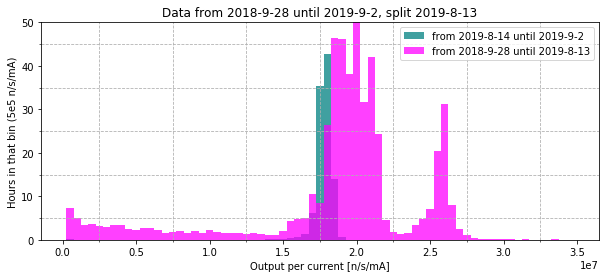

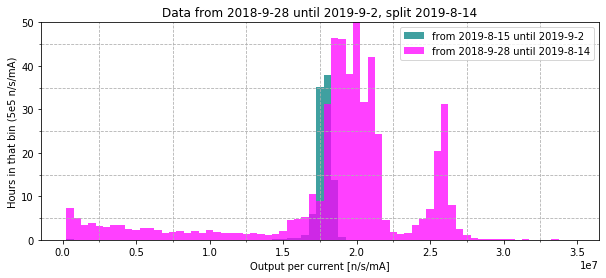

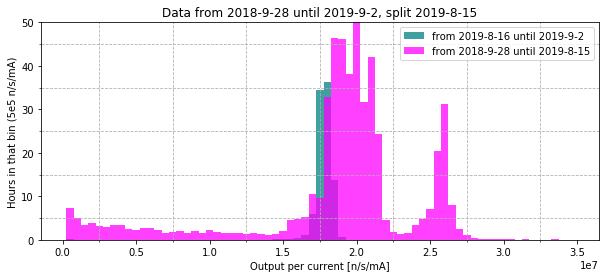

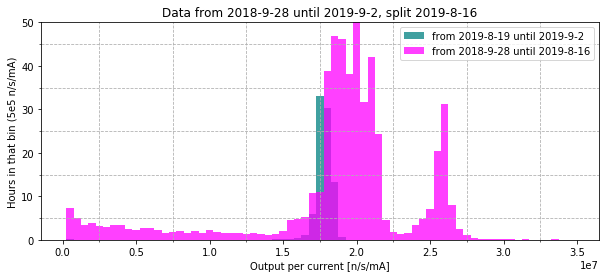

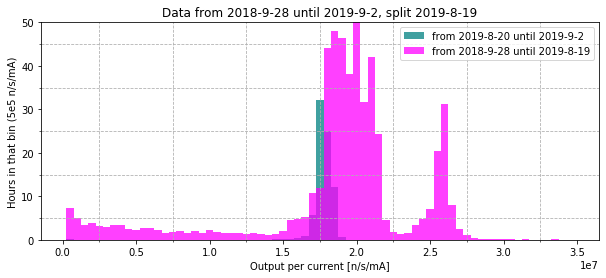

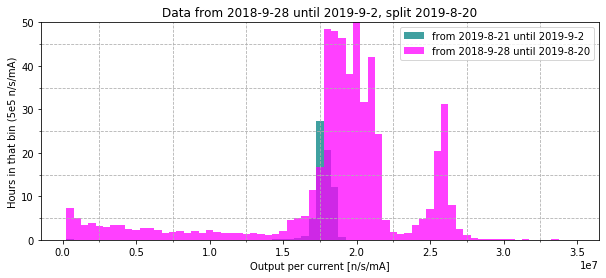

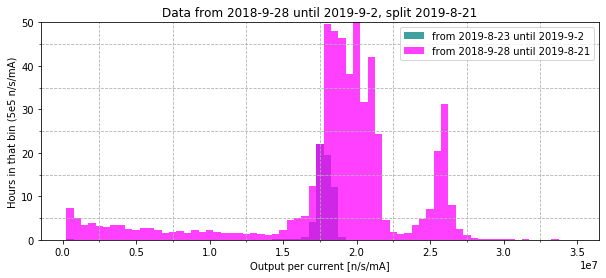

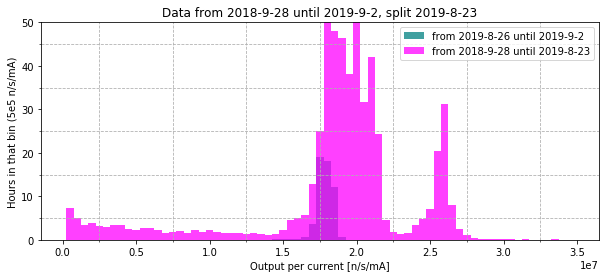

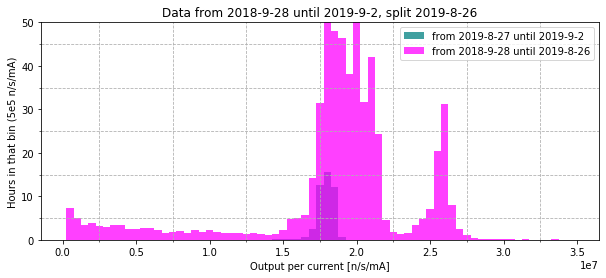

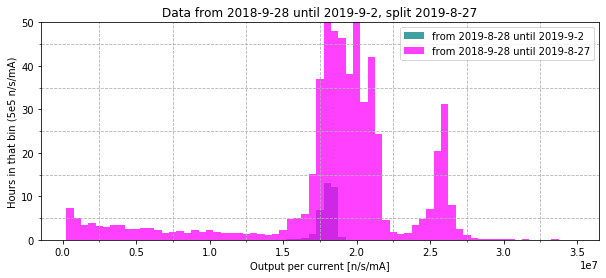

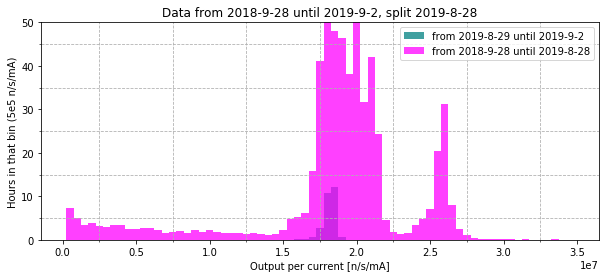

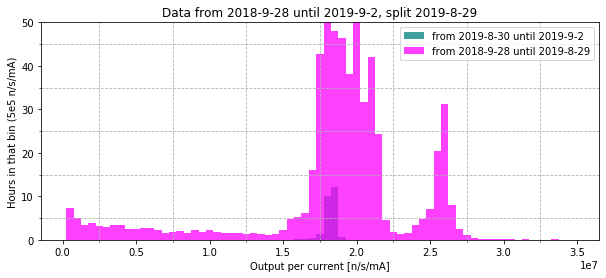

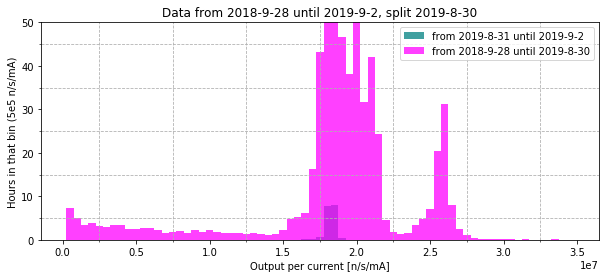

In [74]:
start_date = '2018-09-28 00:00:00'
end_date = '2019-09-25 00:00:00'
    
col = 'output_per_current'  # column
color1 = 'magenta'
color2 = 'teal'

# select only the dates beyond start_date
data_air_cooled = data[start_date:]
dates_available = data_air_cooled['date'].unique()[1:-1]  # skip the first as the divider and the last

# initialize for the plot
xlabel = 'Output per current [n/s/mA]'
ylabel = 'Hours in that bin (5e5 n/s/mA)'
ylims = [0, 50]
max_bins = 3.5e7
step_bins = 5e5

# loop through the dates and plot
ii = 0
for ii in range(0,len(dates_available)-1):
    # this date
    date = dates_available[ii]
    # next date
    next_date = dates_available[ii+1]
    # date is the dividing date
    date = pd.to_datetime(date, format='%Y-%m-%d').strftime('%Y-%m-%d')
    data1 = data_air_cooled[start_date:date]

    data2 = data_air_cooled[next_date:end_date]
#     print(date, next_date)
#     print(data1.index[0], data1.index[-1])
#     print(data2.index[0], data2.index[-1])
    plot_hist_split(data1, data2, date, next_date, col, ylims, xlabel, ylabel, max_bins, step_bins, color1, color2)
    ii = ii + 1
    